In [132]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


## Part 1: Data Preprocessing

In [96]:
# Load the fashion mnist dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [97]:
# Normalize the data [0, 1]
norm_x_train = x_train.astype('float32') / 255.0
norm_x_test  = x_test.astype('float32') / 255.0

In [98]:
# Reshape the dataset into (28, 28, 1)
reshaped_norm_x_train = norm_x_train.reshape(-1, 28, 28, 1)
reshaped_norm_x_test = norm_x_test.reshape(-1, 28, 28, 1)

# Split the train and validaiton set 80% - 20%
reshaped_norm_x_train, reshpaed_norm_x_val, y_train, y_val = train_test_split(reshaped_norm_x_train, y_train, train_size=0.8, random_state=42)

In [99]:
# Print the shapes of each dataset
print(reshaped_norm_x_train.shape, y_train.shape)
print(reshpaed_norm_x_val.shape, y_train.shape)
print(reshaped_norm_x_test.shape, y_val.shape, y_test.shape)

(48000, 28, 28, 1) (48000,)
(12000, 28, 28, 1) (48000,)
(10000, 28, 28, 1) (12000,) (10000,)


## Part 2: Building the CNN Model (Baseline)

In [113]:
# Building Baseline CNN model
baseline_model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), padding='same',  activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),

    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [114]:
# Compile the Baseline CNN model
baseline_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## Part 3: Training & Evaluation 

In [115]:
# Fit the Baseline CNN model
baseline_history = baseline_model.fit(
    reshaped_norm_x_train, y_train, 
    validation_data=(reshpaed_norm_x_val, y_val), 
    epochs=30, 
    batch_size=64,
)

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.7731 - loss: 0.6384 - val_accuracy: 0.8817 - val_loss: 0.3276
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.8891 - loss: 0.3044 - val_accuracy: 0.9023 - val_loss: 0.2717
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9095 - loss: 0.2493 - val_accuracy: 0.9062 - val_loss: 0.2541
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9207 - loss: 0.2203 - val_accuracy: 0.9133 - val_loss: 0.2375
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9267 - loss: 0.1955 - val_accuracy: 0.9164 - val_loss: 0.2280
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9369 - loss: 0.1682 - val_accuracy: 0.9183 - val_loss: 0.2219
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9463 - loss: 0.1463 - val_accuracy: 0.9198 - val_loss: 0.2191
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9520 - loss: 0.1269 - 

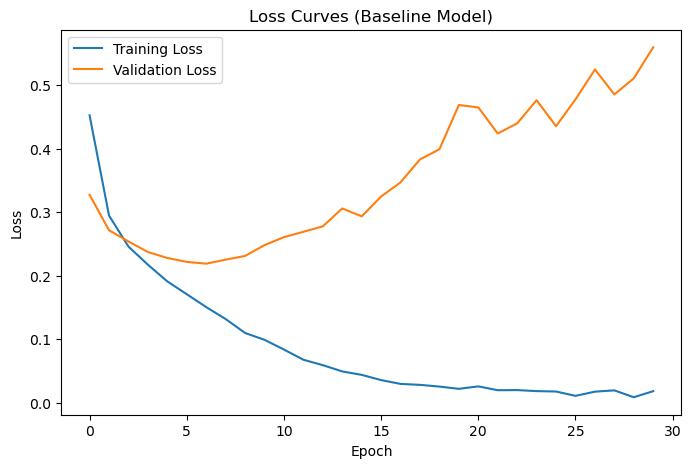

In [153]:
# Plotting the loss curves of Baseline CNN model
plt.figure(figsize=(8, 5))
plt.plot(baseline_history.history['loss'], label='Training Loss')
plt.plot(baseline_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curves (Baseline Model)')
_ = plt.legend()


In [160]:
# Evaluate the test accuracy and loss for baseline model

baseline_test_scores = baseline_model.evaluate(reshaped_norm_x_test, y_test)

print(f"Baseline model test loss: {baseline_test_scores[0]*100:.2f}%")
print(f"Baseline model test accuracy: {baseline_test_scores[1]*100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9156 - loss: 0.6278
Baseline model test loss: 61.18%
Baseline model test accuracy: 91.77%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


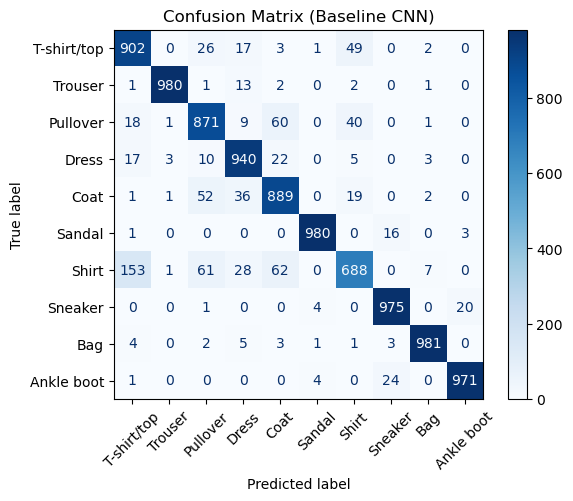

In [225]:
# Confusion matrix for the baseline model
y_pred_baseline = np.argmax(baseline_model.predict(reshaped_norm_x_test), axis=1)

cm = confusion_matrix(y_test, y_pred_baseline)


fashion_classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


disp_baseline = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=fashion_classes)
disp_baseline.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45)

_ = plt.title('Confusion Matrix (Baseline CNN)')


## Part 4.1: Modification -- Larger Filter Size

In [181]:
# Building CNN with larger filter size model
larger_filter_model = keras.Sequential([
        keras.layers.Conv2D(32, (5, 5), activation='relu', padding='same'), # Changed filter size from (3, 3) to (5, 5)
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        
        keras.layers.Conv2D(64, (5, 5), activation='relu', padding='same'), # Changed filter size from (3, 3) to (5, 5
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),

        keras.layers.Dense(10, activation='softmax')
    ])

In [182]:
# Compiling CNN with larger filter size model
larger_filter_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [183]:
# Training CNN with larger filter size model
larger_filter_history = larger_filter_model.fit(
    reshaped_norm_x_train, y_train, 
    validation_data=(reshpaed_norm_x_val, y_val), 
    epochs=30, 
    batch_size=64,
)

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.7613 - loss: 0.6643 - val_accuracy: 0.8661 - val_loss: 0.3726
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.8890 - loss: 0.3130 - val_accuracy: 0.9028 - val_loss: 0.2711
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.9080 - loss: 0.2537 - val_accuracy: 0.9062 - val_loss: 0.2542
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9205 - loss: 0.2160 - val_accuracy: 0.9094 - val_loss: 0.2543
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9281 - loss: 0.1957 - val_accuracy: 0.9162 - val_loss: 0.2496
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9376 - loss: 0.1688 - val_accuracy: 0.9147 - val_loss: 0.2356
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.9465 - loss: 0.1447 - val_accuracy: 0.9163 - val_loss: 0.2349
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 31s 41ms/step - accuracy: 0.9520 - loss: 0.1300 - 

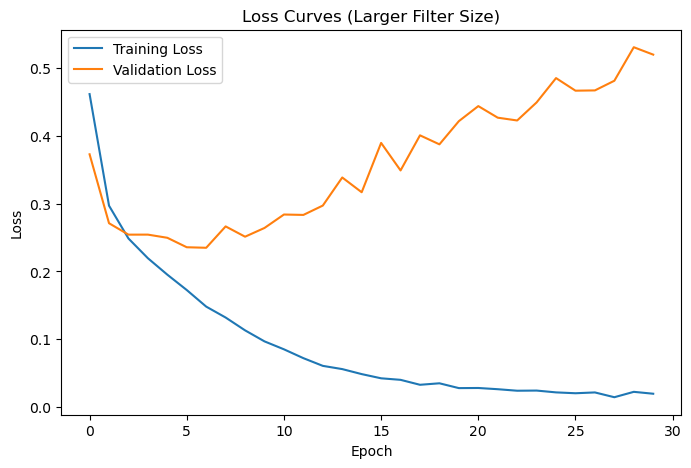

In [184]:
# Plotting loss curves for CNN with larger filter size model
plt.figure(figsize=(8, 5))
plt.plot(larger_filter_history.history['loss'], label='Training Loss')
plt.plot(larger_filter_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curves (Larger Filter Size)')

_ = plt.legend()


In [185]:
# Evaluating test loss and accuracy of CNN with larger filter size model
larger_filter_test_scores = larger_filter_model.evaluate(reshaped_norm_x_test, y_test)

print(f"Larger filter model test loss: {larger_filter_test_scores[0]*100:.2f}%")
print(f"Larger filter model test accuracy: {larger_filter_test_scores[1]*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9091 - loss: 0.6370
Dropout model test loss: 60.89%
Dropout model test accuracy: 91.33%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


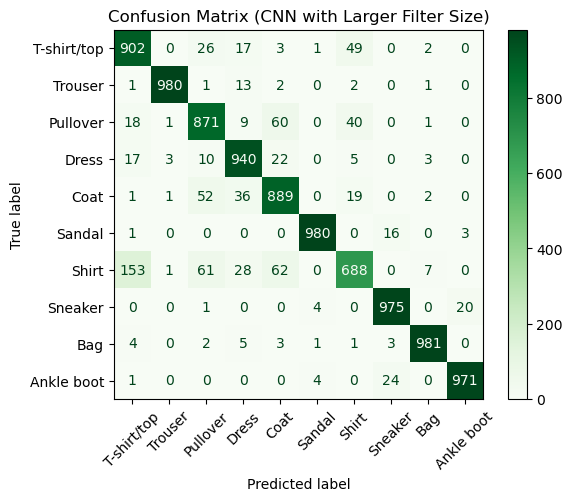

In [226]:
# Confusion matrix for CNN with larger filter size model
y_pred_larger_filter = np.argmax(larger_filter_model.predict(reshaped_norm_x_test), axis=1)

cm_larger_filter = confusion_matrix(y_test, y_pred_larger_filter)

disp_larger_filter = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=fashion_classes)
disp_larger_filter.plot(cmap=plt.cm.Greens)

plt.xticks(rotation=45)
_ = plt.title('Confusion Matrix (CNN with Larger Filter Size)')


## Part 4.2: Modification -- Dropout Model

In [162]:
# Building CNN with dropout model
dropout_model = keras.Sequential([
        keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Dropout(0.3),
        
        keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Dropout(0.3),
        
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(10, activation='softmax')
    ])

In [163]:
# Compiling CNN with dropout model

dropout_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [164]:
# Training CNN with dropout model
dropout_history = dropout_model.fit(
    reshaped_norm_x_train, y_train, 
    validation_data=(reshpaed_norm_x_val, y_val), 
    epochs=30, 
    batch_size=64,
)

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.6722 - loss: 0.8897 - val_accuracy: 0.8638 - val_loss: 0.3772
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.8398 - loss: 0.4491 - val_accuracy: 0.8808 - val_loss: 0.3193
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.8618 - loss: 0.3872 - val_accuracy: 0.8928 - val_loss: 0.2895
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.8719 - loss: 0.3465 - val_accuracy: 0.8988 - val_loss: 0.2744
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.8802 - loss: 0.3308 - val_accuracy: 0.9019 - val_loss: 0.2572
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.8876 - loss: 0.3111 - val_accuracy: 0.9067 - val_loss: 0.2522
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.8937 - loss: 0.2872 - val_accuracy: 0.9061 - val_loss: 0.2505
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.8950 - loss: 0.2809 - 

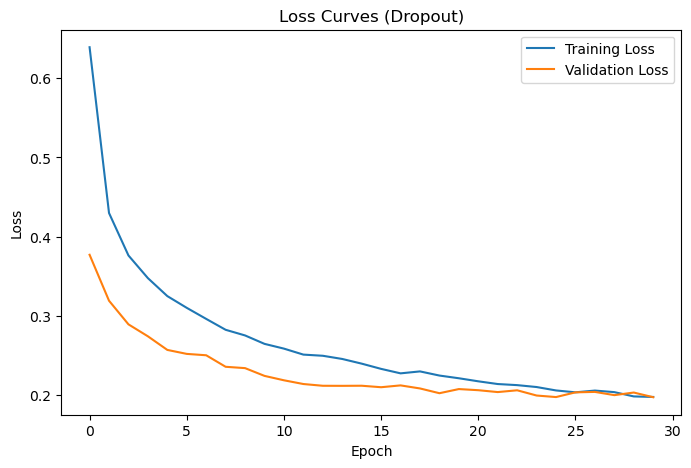

In [165]:
# Plotting loss curves for CNN with dropout model
plt.figure(figsize=(8, 5))
plt.plot(dropout_history.history['loss'], label='Training Loss')
plt.plot(dropout_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curves (Dropout)')

_ = plt.legend()


In [166]:
# Evaluating test loss and accuracy for CNN with dropout model
dropout_test_scores = dropout_model.evaluate(reshaped_norm_x_test, y_test)

print(f"Dropout model test loss: {dropout_test_scores[0]*100:.2f}%")
print(f"Dropout model test accuracy: {dropout_test_scores[1]*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9207 - loss: 0.2357
Dropout model test loss: 22.44%
Dropout model test accuracy: 92.09%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


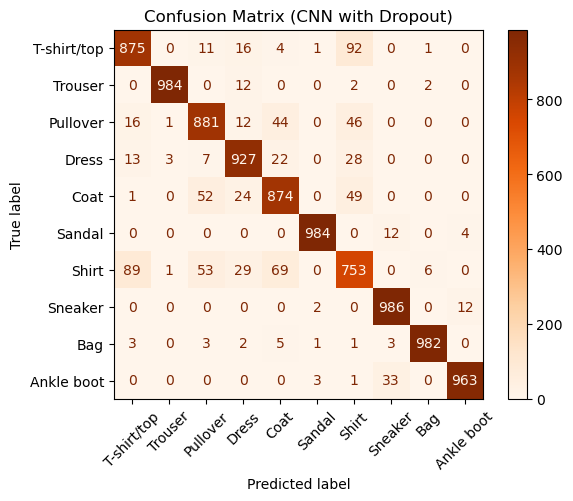

In [222]:
# Confusion matrix of CNN with dropout model

y_pred_dropout = np.argmax(dropout_model.predict(reshaped_norm_x_test), axis=1)

cm = confusion_matrix(y_test, y_pred_dropout)

disp_dropout = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=fashion_classes)
disp_dropout.plot(cmap=plt.cm.Oranges)

plt.xticks(rotation=45)
_ = plt.title('Confusion Matrix (CNN with Dropout)')


## Model Comparison

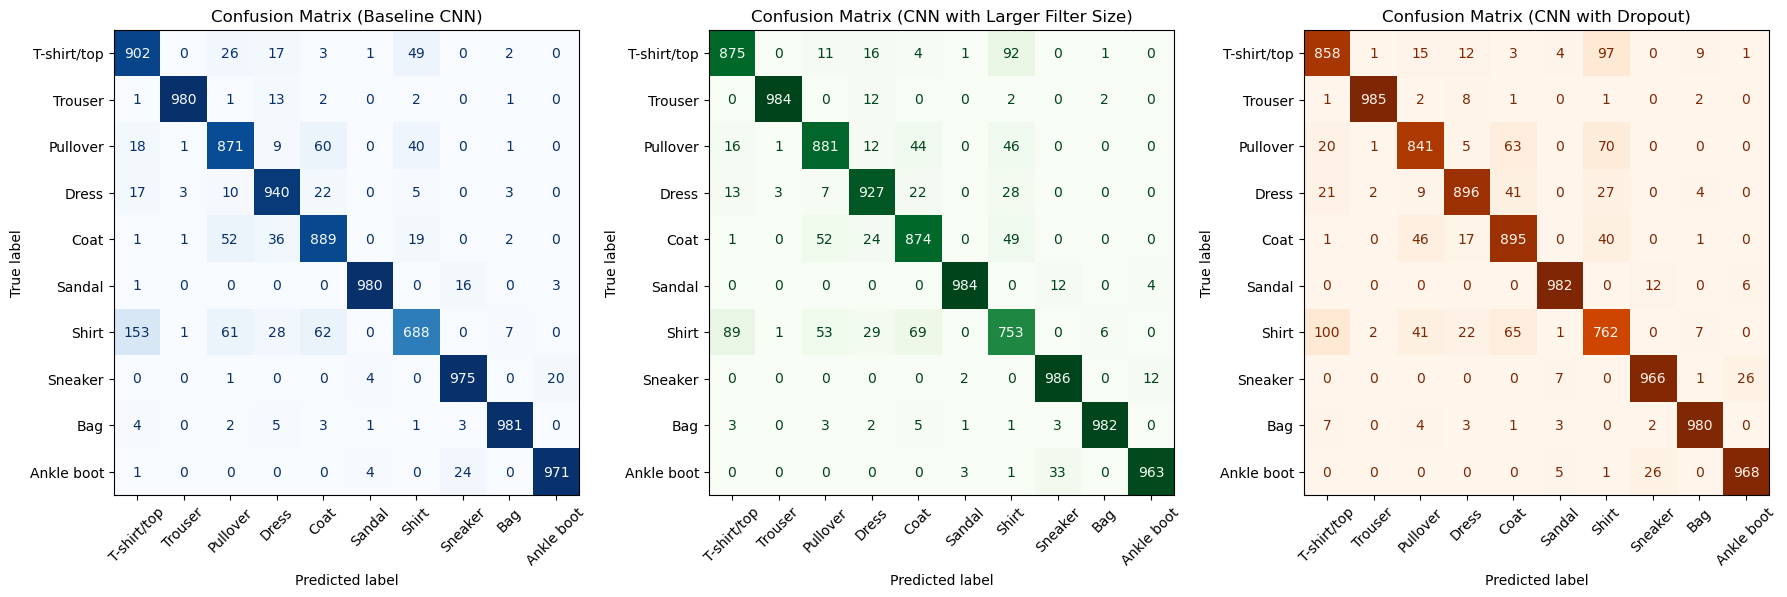

In [248]:
# Confusion matrices of all three models in one plot
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot the confusion matrix for Baseline model
disp_baseline = ConfusionMatrixDisplay(cm_baseline, display_labels=class_names)
disp_baseline.plot(ax=axs[0], cmap=plt.cm.Blues, colorbar=False)
axs[0].set_title('Confusion Matrix (Baseline CNN)')
axs[0].set_xticklabels(class_names, rotation=45)

# Plot the confusion matrix for Dropout model
disp_dropout = ConfusionMatrixDisplay(cm_dropout, display_labels=class_names)
disp_dropout.plot(ax=axs[1], cmap=plt.cm.Greens, colorbar=False)
axs[1].set_title('Confusion Matrix (CNN with Larger Filter Size)')
axs[1].set_xticklabels(class_names, rotation=45)

# Plot the confusion matrix for Larger Filter Size model
disp_larger_filter = ConfusionMatrixDisplay(cm_larger_filter, display_labels=class_names)
disp_larger_filter.plot(ax=axs[2], cmap=plt.cm.Oranges, colorbar=False)
axs[2].set_title('Confusion Matrix (CNN with Dropout)')
axs[2].set_xticklabels(class_names, rotation=45)

_ = plt.tight_layout()


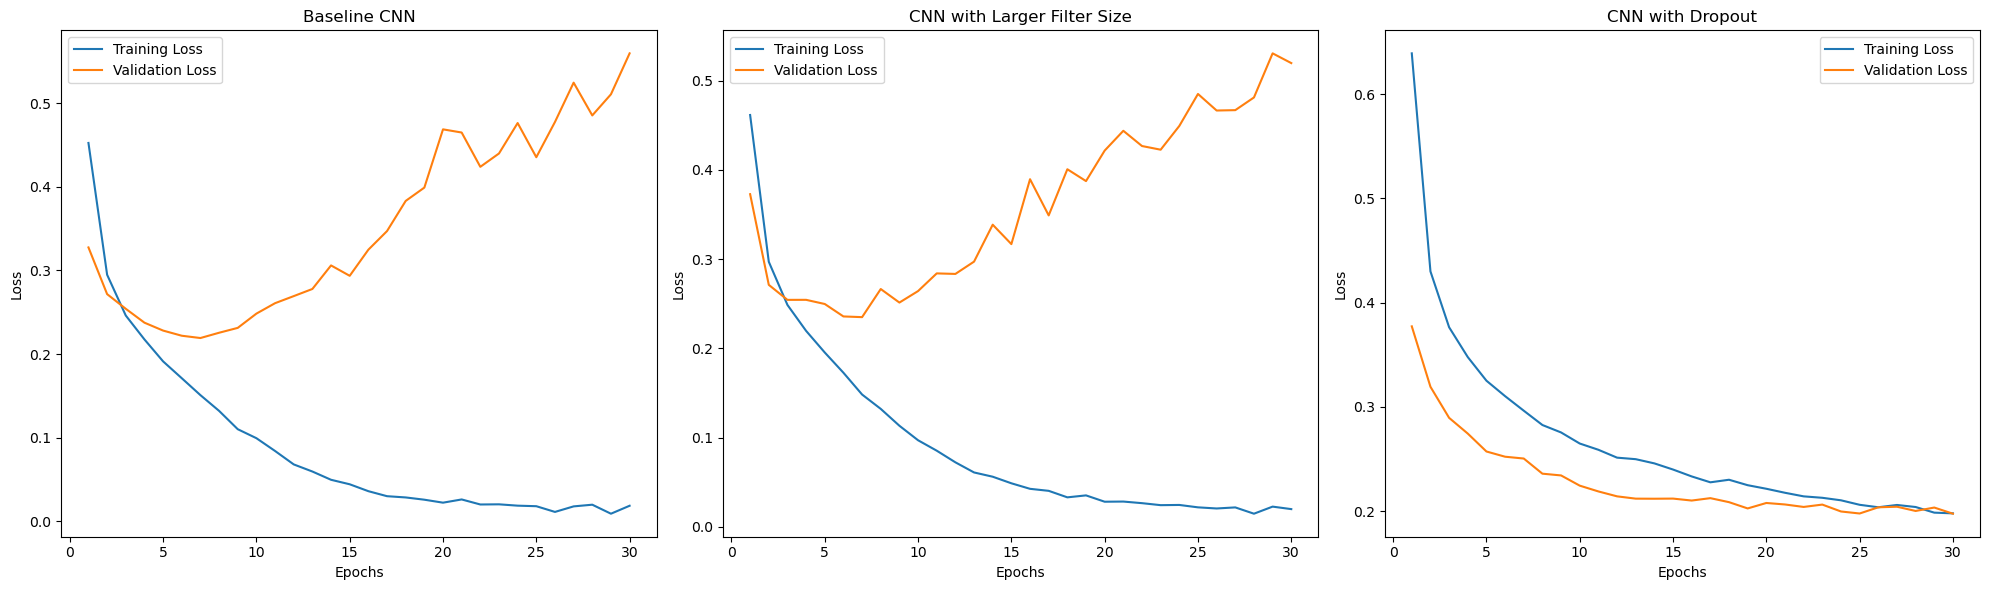

In [247]:
# Loss curves of all three models in one plot

model_histories = [baseline_history, larger_filter_history, dropout_history]
titles = ['Baseline CNN', 'CNN with Larger Filter Size', 'CNN with Dropout',]

fig_metrics, axs_metrics = plt.subplots(1, 3, figsize=(20, 6))

for i, history in enumerate(model_histories):
    ax = axs_metrics[i]
    
    epochs = range(1, len(history.history['loss']) + 1)
    ax.plot(epochs, history.history['loss'], label='Training Loss')
    ax.plot(epochs, history.history['val_loss'], label='Validation Loss')
    
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    
    ax.set_title(titles[i])
    ax.legend()

_ = plt.tight_layout()


In [237]:
# Printing test losses and accuracies of all three models in one plot

print(f"Baseline model test loss: {baseline_test_scores[0]*100:.2f}%")
print(f"Baseline model test accuracy: {baseline_test_scores[1]*100:.2f}%")
print('')
print(f"Larger filter model test loss: {larger_filter_test_scores[0]*100:.2f}%")
print(f"Larger filter model test accuracy: {larger_filter_test_scores[1]*100:.2f}%")
print('')
print(f"Dropout model test loss: {dropout_test_scores[0]*100:.2f}%")
print(f"Dropout model test accuracy: {dropout_test_scores[1]*100:.2f}%")

Baseline model test loss: 61.18%
Baseline model test accuracy: 91.77%

Larger filter model test loss: 60.89%
Larger filter model test accuracy: 91.33%

Dropout model test loss: 22.44%
Dropout model test accuracy: 92.09%
